# INTRODUCTION TO MACHINE LEARNING
#### Algorithms: Modules that computer learn and make predictions
#### Applications: Image recognition, spam detection, stock price prediction, etc.


Approaches to machine learning
1. Supervised learning:
    - Data with labels
    - Classification: Predict a label
    - Regression: Predict a continuous value
    - Linear regression: Predict a continuous value
2. Unsupervised learning:
    - Data without labels
    - Clustering: Group similar items together
    - Dimension reduction: Reduce the number of features
    - Association rule learning: Discover rules that describe the data
    - K-means clustering: Group similar items together
    - Hierarchical clustering
    - Principal component analysis (PCA): Reduce the number of features
3. Reinforcement learning:
    - Learn to interact with an environment
    - Learn from feedback
    - Learn how to map situations to actions
    - Learn the best policy
    - Learn the best policy for a self-driving car
    - Learn the best policy for a game-playing AI
    - Learn the best policy for a robot



Problem formulation
1. Define the problem: Classification tasks, regression analysis, clustering, anomaly detection, etc.
2. Collect data: Data collection, data labeling, data augmentation, etc.
~ Split the data into training, validation, and test sets
3. Prepare data: Data cleaning, data transformation, data reduction, etc.
4. Train a model: Select a model, train a model, evaluate a model, etc.
5. Evaluate the model: Test the model, tune the model, etc.
6. Improve the model: Feature engineering, hyperparameter tuning, etc.
7. Present the solution: Present the results, deploy the model, etc.


## Data Types
1. Numerical data: Continuous values
    - Age, height, weight, etc.
        - Discrete values: Integers
                - Number of children, number of pets, etc.
        - Continuous values: Real numbers
                - Age, height, weight, etc.
                        - Interval data: No true zero
                                - Temperature in Celsius, temperature in Fahrenheit, etc.
        - Ratio data: True zero
                - Temperature in Kelvin, length, mass, etc.
        - Ordinal data: Ordered values
                - Rankings, ratings, etc.

2. Categorical data: Can be measured against each other
3. Ordinal data: Can be ordered
4. Nominal data: Cannot be ordered

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Machine learning for regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

#Control display
pd.set_option('display.max_columns', 50)
sns.set(style='darkgrid', rc={'axes.facecolor': '#CAF1DE'})

In [2]:
#Load the dataset
df = pd.read_csv('datasets/heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#### Summary
1. The dataset contains 303 rows and 14 columns
2. The dataset contains 13 features and 1 target variable
3. The dataset contains 7 numerical features and 6 categorical features
4. The dataset contains 165 rows with missing values
5. The dataset contains 138 rows with duplicate values
6. The dataset contains 0 rows with zero values
7. The dataset contains 0 rows with negative values
8. The dataset contains 0 rows with infinite values
9. The dataset contains 0 rows with NaN values
10. The dataset contains 0 rows with null values

##### Key
cp = chest pain
trestbps = resting blood pressure
chol = serum cholestoral
fbs = fasting blood sugar
restecg = resting electrocardiographic results
thalach = maximum heart rate achieved
exang = exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
ca = number of major vessels (0-3)
thal = thalium stress result
target = 0 or 1, have diseases or not


In [3]:
# Show number of people with and without heart disease
# Column 'target' is the target variable
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [4]:
# Show percentage of male and female
count_female = len(df[df.sex == 0])
count_male = len(df[df.sex == 1])

#Show output
print('Percentage of female patients: {:.2f}%'.format((count_female / len(df.sex)) * 100))
print('Percentage of male patients: {:.2f}%'.format((count_male / len(df.sex)) * 100))


Percentage of female patients: 30.44%
Percentage of male patients: 69.56%


In [5]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


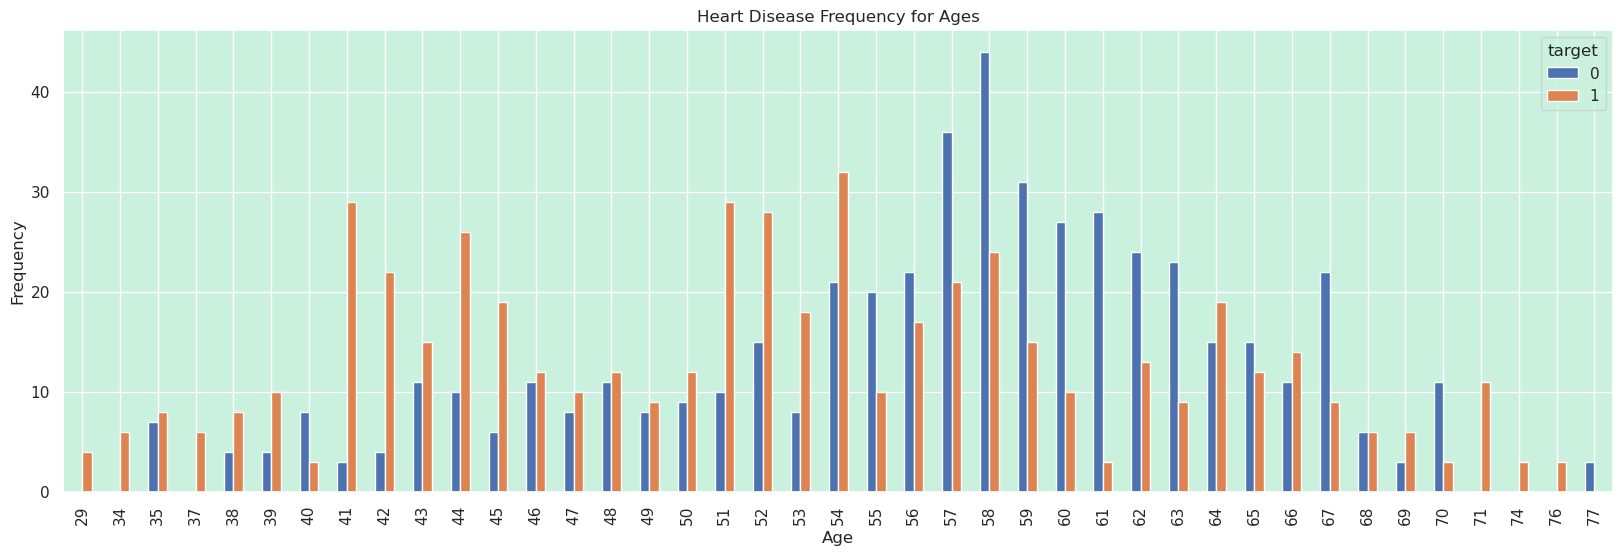

In [6]:
# Bar plot showing heart disease frequency of age
pd.crosstab(df.age, df.target).plot(kind='bar', figsize=(20, 6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

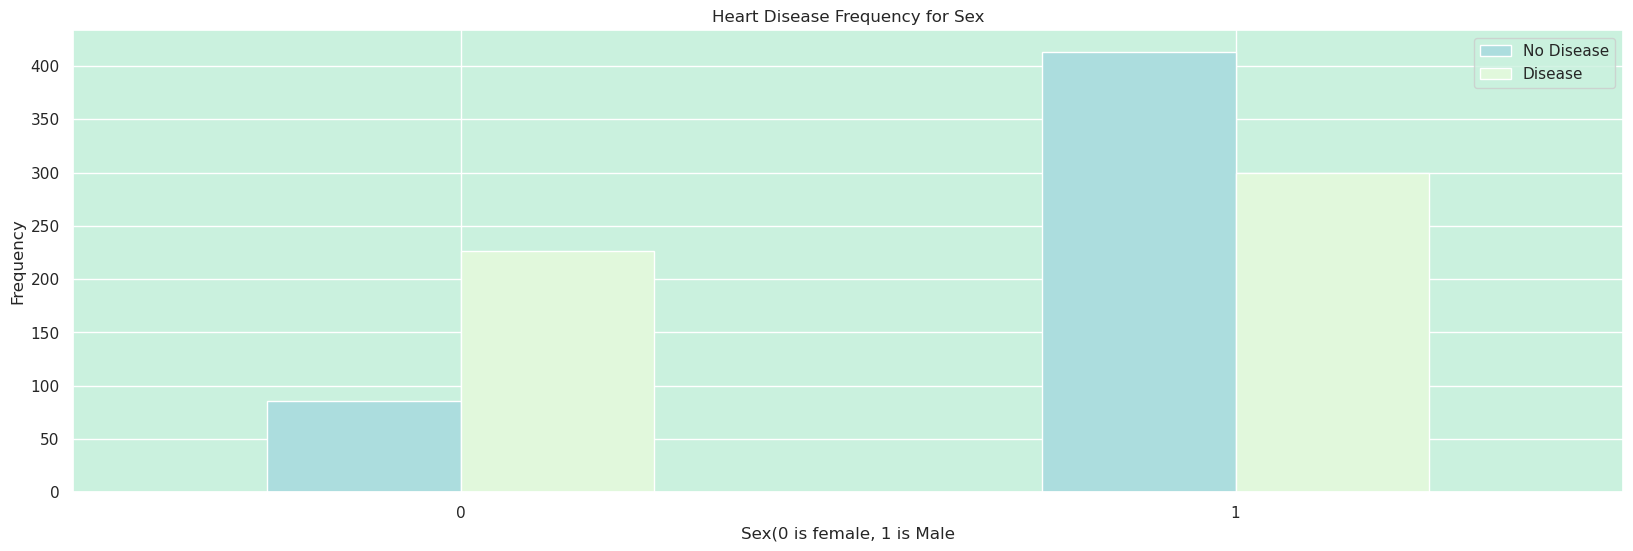

In [7]:
# Data visualisation of heart disease frequency for sex
pd.crosstab(df.sex, df.target).plot(kind='bar', figsize=(20, 6), color=['#ACDDDE', '#E1F8DC'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex(0 is female, 1 is Male')
plt.ylabel('Frequency')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0)
plt.show()

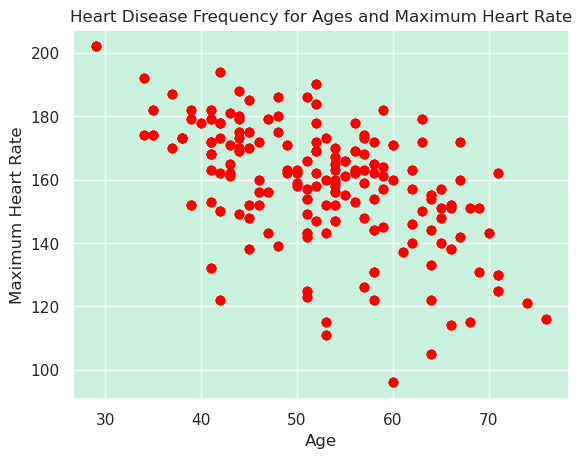

In [8]:
# Scatter plot showing heart disease frequency for age and maximum heart rate
plt.scatter(x=df.age[df.target==1], y=df.thalach[df.target==1], c='red')
plt.title('Heart Disease Frequency for Ages and Maximum Heart Rate')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.show()

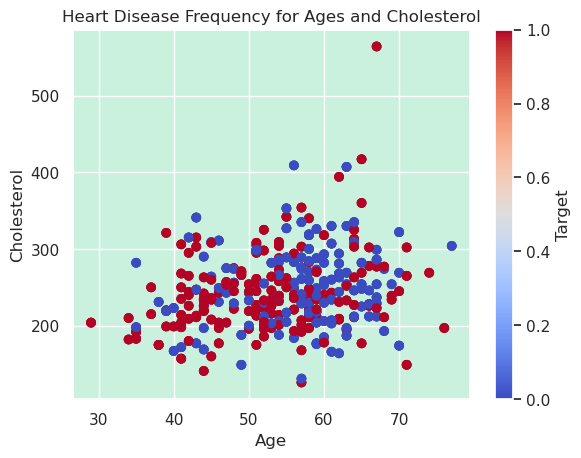

In [9]:
# Scatter plot for age vs cholesterol
age = df['age']
chol = df['chol']

#Create scatter plot
plt.scatter(age, chol, c= df['target'], cmap='coolwarm')
plt.title('Heart Disease Frequency for Ages and Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.colorbar(label = 'Target')
plt.show()

# Working with ML model Accuracy of Different ML Algorithms
1. Create a model for logistic regression
2. Solve problems based on classification. Create independent and dependent variables
3. Categorical prediction


In [10]:
# Creating a model for logistic regression
y = df.target.values
x_data = df.drop(['target'], axis=1)

In [11]:
# Normalize data
# 80% of the data is used for training and 20% for testing
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values


/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [12]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)


In [13]:
# Transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [14]:
# Create a model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_train.T, y_train.T)

LogisticRegression()

In [15]:
# Model evaluation
y_pred = logistic_regression_model.predict(x_test.T)
accuracy = accuracy_score(y_test.T, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

print('Test accuracy: {:.2f}%'.format(logistic_regression_model.score(x_test.T, y_test.T) * 100))


Accuracy: 83.41%
Test accuracy: 83.41%


In [16]:
# Create a model for linear regression
linear_regression = LinearRegression()
linear_regression.fit(x_train.T, y_train.T)

LinearRegression()

In [17]:
# Test the model
print('Test accuracy: {:.2f}%'.format(linear_regression.score(x_test.T, y_test.T) * 100))

Test accuracy: 47.25%


In [18]:
"""
Final Project
1. Data Science
2. Machine Learning
3. Web Development

It will be out on Friday
"""


'\nFinal Project\n1. Data Science\n2. Machine Learning\n3. Web Development\n\nIt will be out on Friday\n'

# Decision Tree Model

In [3]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import graphviz     # This is used to plot the decision tree
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split
%matplotlib inline


In [4]:
# Load the dataset
df = pd.read_csv('datasets/heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [21]:
# Show the mean
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


In [22]:
# Check for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [23]:
# ML for train and test
# Create logistic regression model
y = df.target.values
x_data = df.drop(['target'], axis=1)


In [24]:
# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size=0.33, random_state=40)



In [25]:
# show the shape of the training and testing sets
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(686, 13)
(339, 13)
(686,)
(339,)


In [26]:
# check the datatype
x_train.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object

In [27]:
# check the x_train header
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
945,56,1,3,120,193,0,0,162,0,1.9,1,0,3
307,44,1,1,120,220,0,1,170,0,0.0,2,0,2
740,44,1,2,140,235,0,0,180,0,0.0,2,0,2
787,51,1,0,140,298,0,1,122,1,4.2,1,3,3
863,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [28]:
# Decision Tree Classifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [29]:
# Predict the class label for the test set using the decision tree classifier
y_pred = clf_gini.predict(x_test)
print(y_pred)
print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))



[0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1
 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1
 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1
 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1
 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1
 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0
 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0
 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1
 1 1 1 0 1 0]
Model accuracy score with criterion gini index: 0.8260


In [30]:
# Predict the class label for the train set using the decision tree classifier
y_pred_train = clf_gini.predict(x_train)
print(y_pred_train)
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train)))

[0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1
 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1
 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0
 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1
 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0
 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0
 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1
 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1
 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1
 0 0 1 0 1 0 1 0 1 0 1 1 

In [31]:
# Print the training and testing set accuracy score
print('Training set accuracy score: {:.4f}'.format(clf_gini.score(x_train, y_train)))
print('Test set accuracy score: {:.4f}'.format(clf_gini.score(x_test, y_test)))

Training set accuracy score: 0.8455
Test set accuracy score: 0.8260


[Text(0.5, 0.875, 'x[2] <= 0.5\ngini = 0.5\nsamples = 686\nvalue = [335, 351]'),
 Text(0.25, 0.625, 'x[11] <= 0.5\ngini = 0.376\nsamples = 331\nvalue = [248, 83]'),
 Text(0.125, 0.375, 'x[12] <= 2.5\ngini = 0.499\nsamples = 137\nvalue = [66, 71]'),
 Text(0.0625, 0.125, 'gini = 0.387\nsamples = 84\nvalue = [22, 62]'),
 Text(0.1875, 0.125, 'gini = 0.282\nsamples = 53\nvalue = [44, 9]'),
 Text(0.375, 0.375, 'x[9] <= 0.45\ngini = 0.116\nsamples = 194\nvalue = [182, 12]'),
 Text(0.3125, 0.125, 'gini = 0.34\nsamples = 46\nvalue = [36, 10]'),
 Text(0.4375, 0.125, 'gini = 0.027\nsamples = 148\nvalue = [146, 2]'),
 Text(0.75, 0.625, 'x[9] <= 1.7\ngini = 0.37\nsamples = 355\nvalue = [87, 268]'),
 Text(0.625, 0.375, 'x[0] <= 55.5\ngini = 0.296\nsamples = 310\nvalue = [56, 254]'),
 Text(0.5625, 0.125, 'gini = 0.149\nsamples = 185\nvalue = [15, 170]'),
 Text(0.6875, 0.125, 'gini = 0.441\nsamples = 125\nvalue = [41, 84]'),
 Text(0.875, 0.375, 'x[10] <= 0.5\ngini = 0.429\nsamples = 45\nvalue = [31, 1

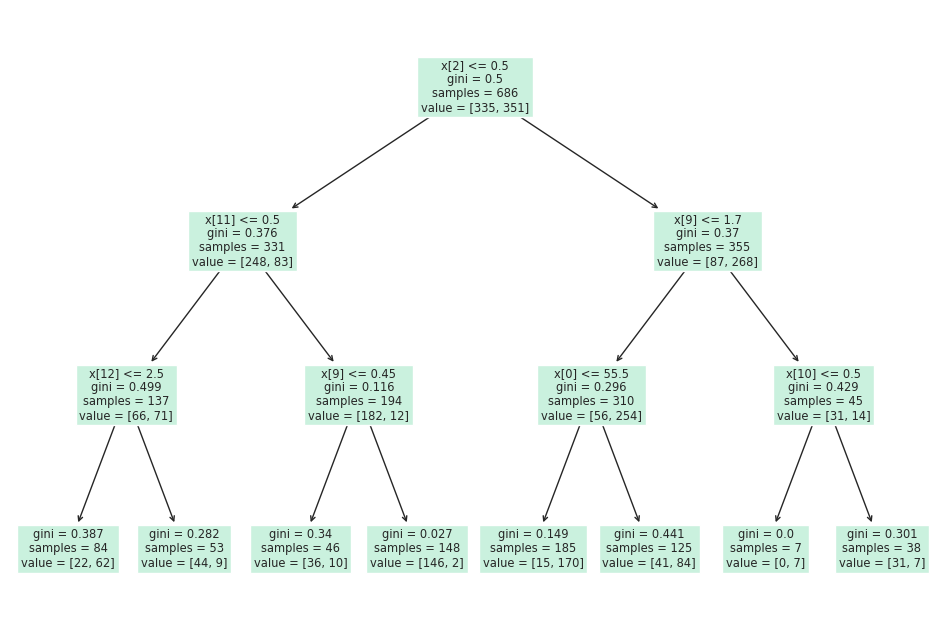

In [32]:
# Visualize decision-tree leaf nodes (1st way - create figure for width and height)
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_gini.fit(x_train, y_train))

In [5]:
# Visualization of decision tree

# Load the dataset
heart_df = pd.read_csv('datasets/heart_disease.csv')
y = heart_df.target.values
x = heart_df.drop(['target'], axis=1)

# Train the decision tree classifiers
model = tree.DecisionTreeClassifier()
model.fit(x, y)

# Get the class name from the dataset
class_name = heart_df.target.unique().astype(str)

# Generate the graphviz representation of the decision tree
dot_data = tree.export_graphviz(model, out_file='heart_disease.dot', feature_names=x.columns, class_names=class_name, filled=True, rounded=True, special_characters=True)

In [37]:
# Visualize decision-trees
dot_data = tree.export_graphviz(clf_gini, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('heart_disease')

'heart_disease.pdf'